<a href="https://colab.research.google.com/github/manishyyadav/banking/blob/main/Stock_Market_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
stock = 'SBIN.NS'

data = yf.download(stock)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409930,43733533
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014929,56167280
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694572,68296318
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654142,86073880
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588826,76613039
...,...,...,...,...,...,...,...
6996,2023-11-01,566.250000,569.650024,563.849976,566.400024,566.400024,13575575
6997,2023-11-02,571.099976,575.450012,567.599976,572.099976,572.099976,11148516
6998,2023-11-03,576.000000,579.500000,573.450012,578.150024,578.150024,11371371
6999,2023-11-06,582.000000,582.500000,573.250000,574.349976,574.349976,16499138


In [6]:
ma_100_days = data.Close.rolling(100).mean()

In [13]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=ma_100_days.index, y=ma_100_days, mode='lines', name='MA (100 days)', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close', line=dict(color='green')))

# You can customize the layout as needed
fig.update_layout(
    title='Interactive Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True  # Add a range slider for zooming
)

# Show the interactive chart
fig.show()



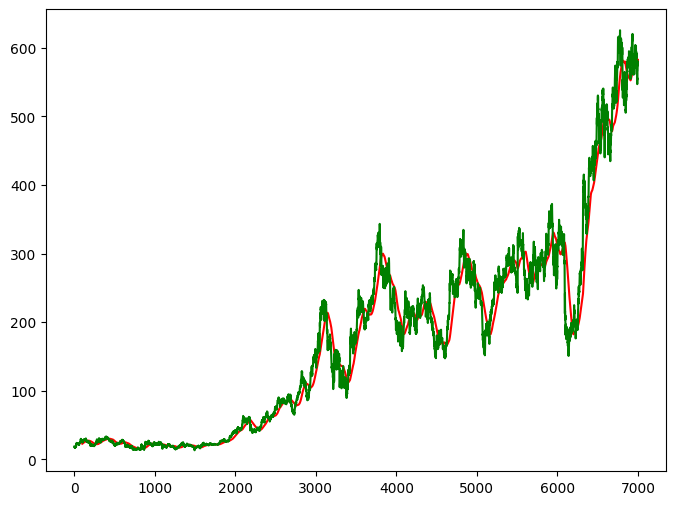

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [14]:
ma_200_days = data.Close.rolling(200).mean()

In [16]:
import plotly.express as px
fig = px.line()
fig.add_scatter(x=ma_100_days.index, y=ma_100_days, mode='lines', name='MA (100 days)', line=dict(color='red'))
fig.add_scatter(x=ma_200_days.index, y=ma_200_days, mode='lines', name='MA (200 days)', line=dict(color='blue'))
fig.add_scatter(x=data.index, y=data.Close, mode='lines', name='Close', line=dict(color='green'))
fig.update_layout(
    title='Interactive Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True
)
fig.show()

In [18]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.85)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.85): len(data)])

In [24]:
data_train.shape[0]

5950

In [25]:
data_test.shape[0]

1051

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)

In [28]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [29]:
x, y = np.array(x), np.array(y)

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x,y, epochs = 100, batch_size =128, verbose =1)

Epoch 1/100
46/46 [==============================] - 33s 616ms/step - loss: 0.0424
Epoch 2/100
46/46 [==============================] - 33s 723ms/step - loss: 0.0079
Epoch 3/100
46/46 [==============================] - 29s 636ms/step - loss: 0.0064
Epoch 4/100
46/46 [==============================] - 28s 600ms/step - loss: 0.0059
Epoch 5/100
46/46 [==============================] - 28s 600ms/step - loss: 0.0053
Epoch 6/100
46/46 [==============================] - 29s 632ms/step - loss: 0.0056
Epoch 7/100
46/46 [==============================] - 28s 618ms/step - loss: 0.0058
Epoch 8/100
46/46 [==============================] - 28s 603ms/step - loss: 0.0051
Epoch 9/100
46/46 [==============================] - 28s 608ms/step - loss: 0.0049
Epoch 10/100
46/46 [==============================] - 28s 605ms/step - loss: 0.0050
Epoch 11/100
46/46 [==============================] - 28s 610ms/step - loss: 0.0047
Epoch 12/100
46/46 [==============================] - 29s 615ms/step - loss: 0.0045
E

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
pas_100_days = data_train.tail(100)

In [36]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [37]:
data_test_scale  =  scaler.fit_transform(data_test)

In [38]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [39]:
y_predict = model.predict(x)

33/33 [==============================] - 3s 69ms/step


In [40]:
scale =1/scaler.scale_

In [41]:
y_predict = y_predict*scale

In [42]:
y = y*scale

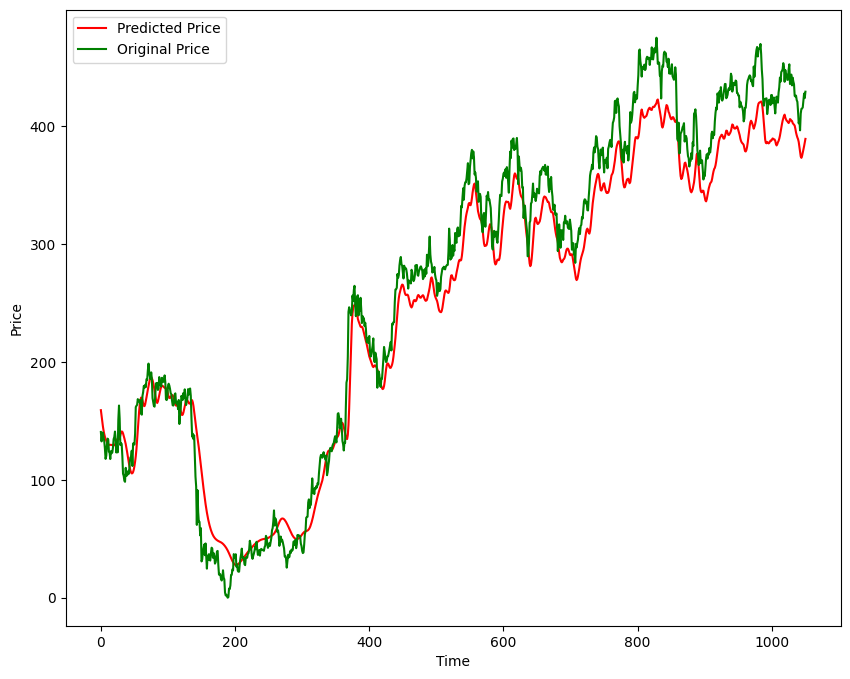

In [43]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
model.save('Stock Predictions Model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [45]:
model.save('my_model.keras')